In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('diabetes.csv')

### Description of the file
This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases (https://www.kaggle.com/uciml/pima-indians-diabetes-database). The purpose of the dataset is to diagnostically predict whether a patient has diabetes based on specific diagnostic measures contained in the dataset. There are several restrictions on the selection of these instances from the larger database. In particular, all patients are women 21 years of age or older of Pima Amerindian origin, which is the community with the highest diabetes prevalence in the world.

### Description of variables

1. Pregnancies - number of pregnancies
2. Glucose - plasma glucose concentration during the two-hour oral glucose tolerance test
3. Blood Pressure- diastolic blood pressure (mm Hg)
4. SkinThickness - the thickness of the triceps skin fold
5. Insulin - insulin level two hours after a meal (μU / ml)
6. BMI - body mass index (kg / m $ ^ 2 $)
7. Diabetes Pedigree Function - diabetes pedigree function (assesses the likelihood of diabetes based on family history)
8. Age - the age of the person
9. Outcome - a binary variable defining the presence or absence of diabetes

In [10]:
int_cols=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "Age", "Outcome"]
float_cols=["BMI", "DiabetesPedigreeFunction"]

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,540.000000,391.000000,756.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.024074,150.936061,32.411640,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.045046,106.674215,6.813761,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,189.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,600.000000,59.400000,2.420000,81.000000,1.000000


In [2]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

The following histogram presents the distribution of diabetes among women in relation to the number of children they have. We can observe that the incidence of the disease increases with the number of offspring. We can draw similar conclusions from the age histogram.

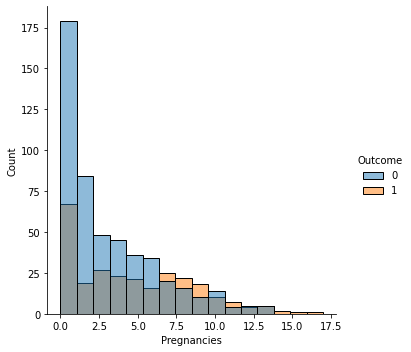

In [3]:
sns.displot(df,x="Pregnancies", hue="Outcome")

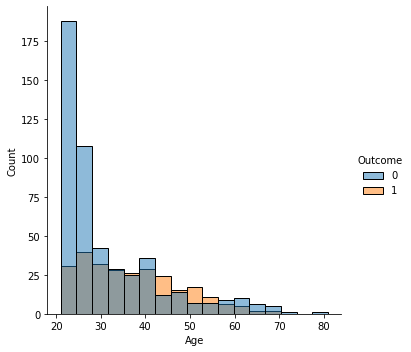

In [16]:
sns.displot(df,x="Age", hue="Outcome")

Then I plot the boxplots showing the distribution and outliers for the same attributes for which I created the histograms.

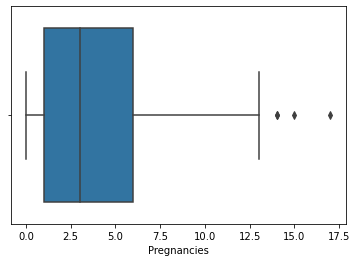

In [5]:
sns.boxplot(x=df["Pregnancies"])

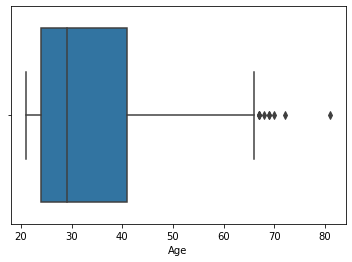

In [17]:
sns.boxplot(x=df["Age"])

The pie chart below shows how big the diabetes problem is for the studied community.

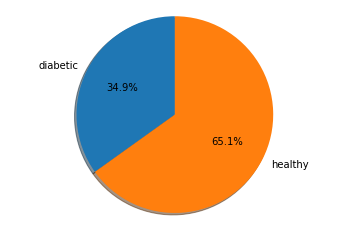

In [4]:
labels = ["diabetic", "healthy"]
sizes = [df[df["Outcome"]==1].count().Outcome, df[df["Outcome"]==0].count().Outcome]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

The chart below shows the relationship between the age of women and their pregnancies. We can note that even at a young age, women in this community have families with many children.

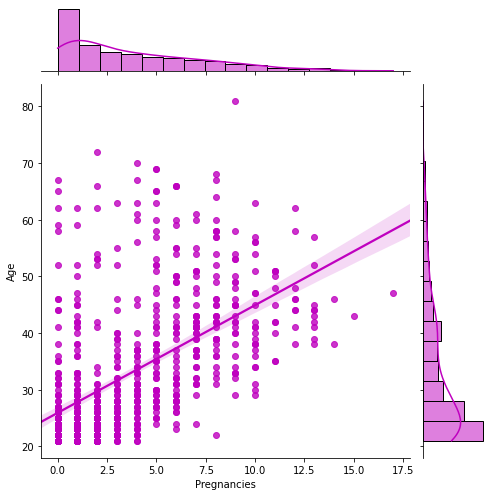

In [19]:
g = sns.jointplot(x=df["Pregnancies"], y=df["Age"],
                  kind="reg", truncate=False,
                  color="m", height=7)

In order to investigate the correlation between individual attributes, I decided to get rid of some outlier values

In [7]:
maximum = df[['SkinThickness']].max()
df[['SkinThickness']] = df[['SkinThickness']].replace(maximum,np.NaN)

for i in range(3):
    maximum = df[['Insulin']].max()
    df[['Insulin']] = df[['Insulin']].replace(maximum,np.NaN)

maximum = df[['BMI']].max()
df[['BMI']] = df[['BMI']].replace(maximum,np.NaN)

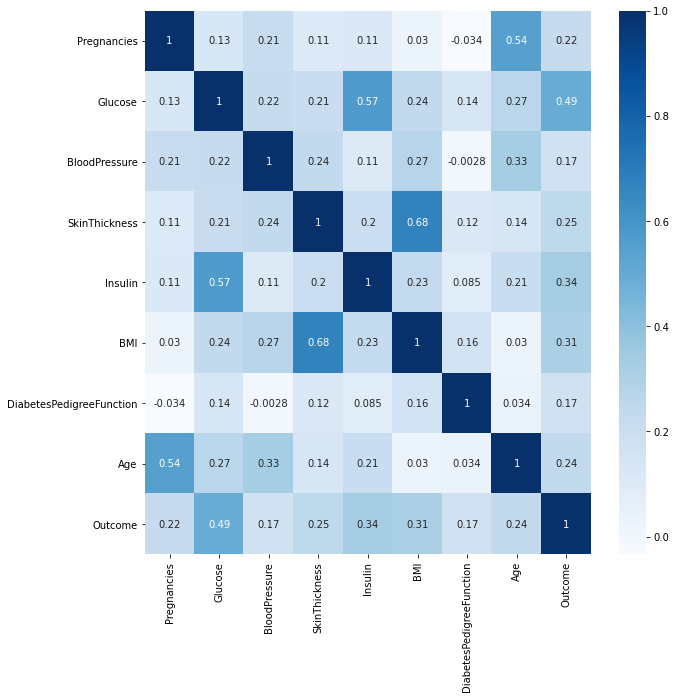

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Blues", annot= True,)
plt.show()

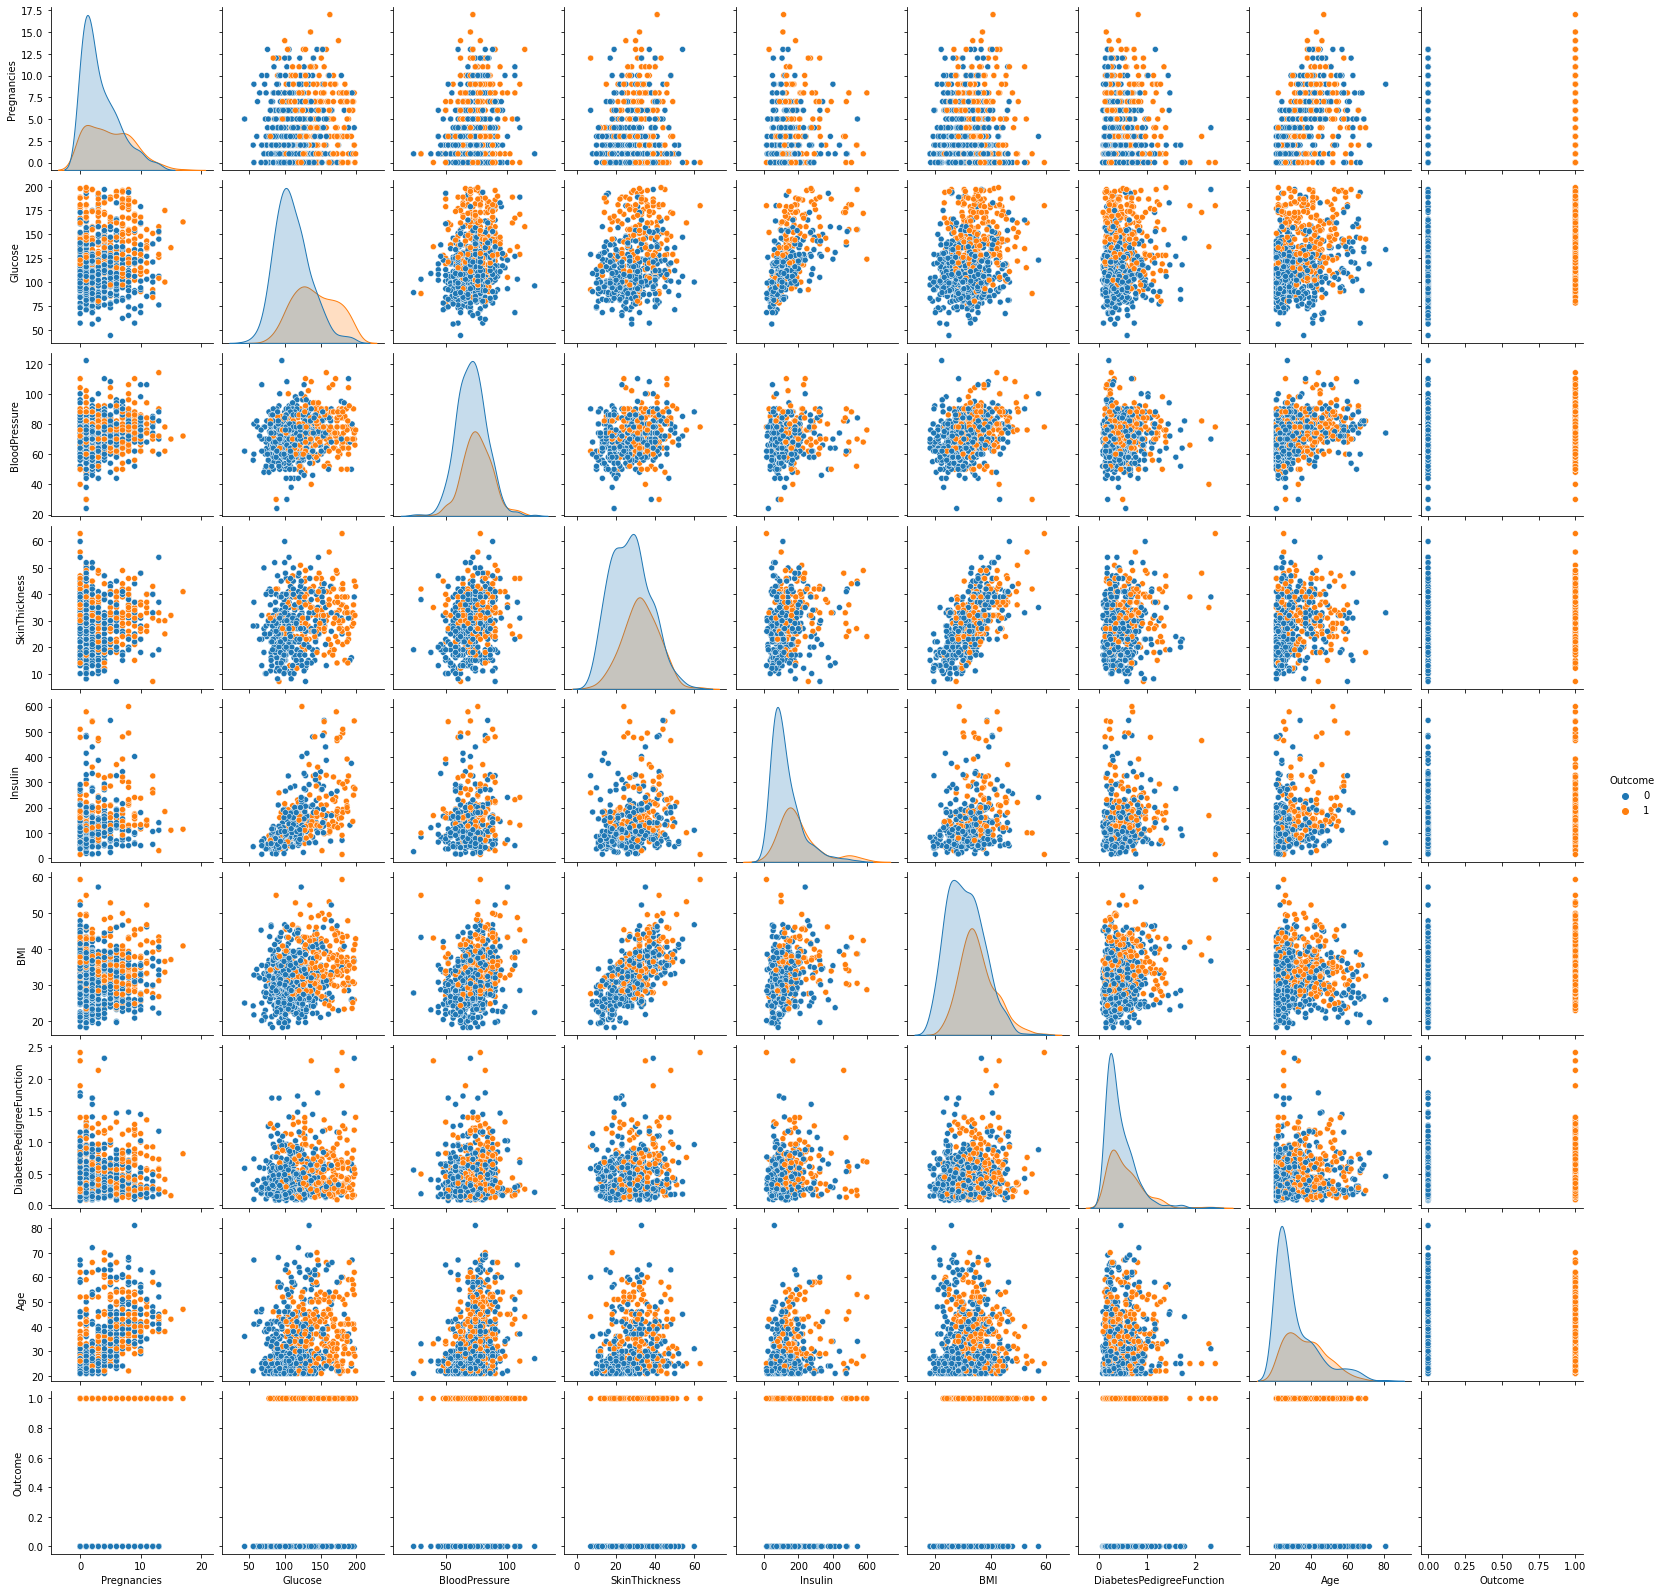

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, hue='Outcome', vars=df.columns)

1. The variable Glucose shows the greatest correlation with the baseline variable.
2. In the pairplot plot and correlation plots, you can see some dependencies of pairwise traits, e.g. Age is correlated to a large extent with Pregnancies, which is intuitive. SkinThickness is also highly correlated with BMI.